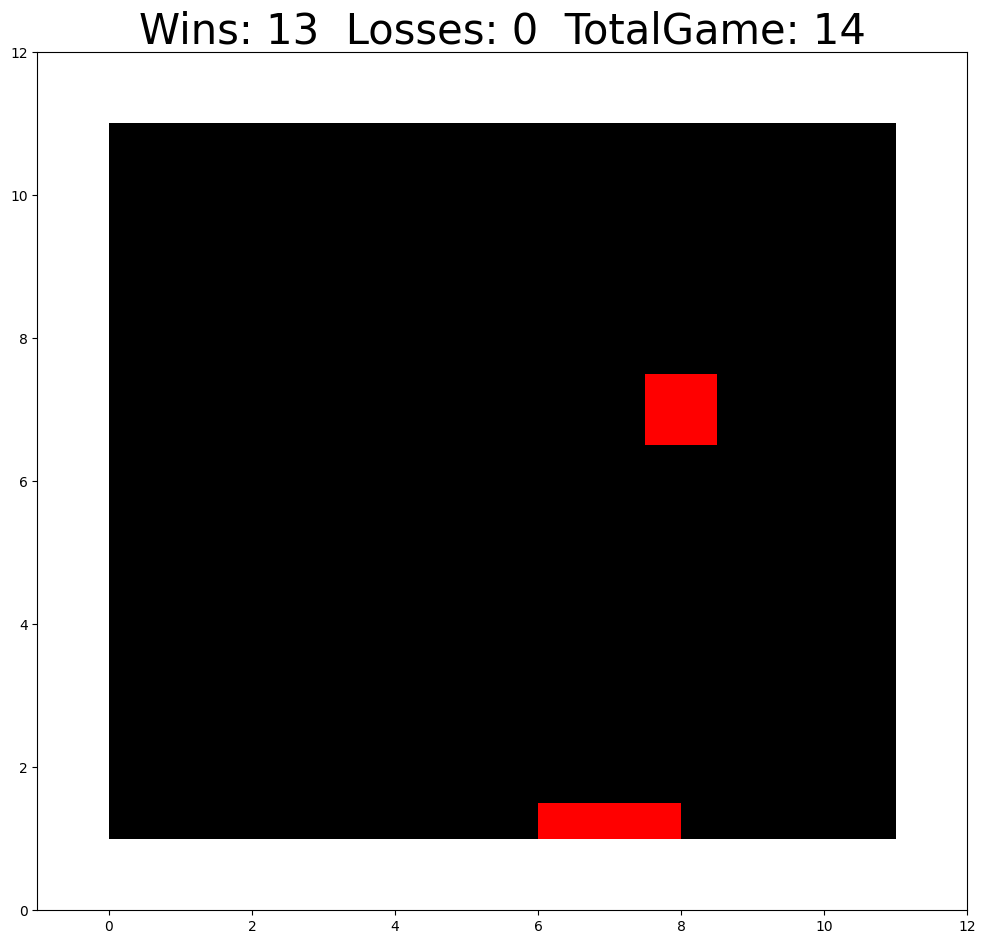

KeyboardInterrupt: 

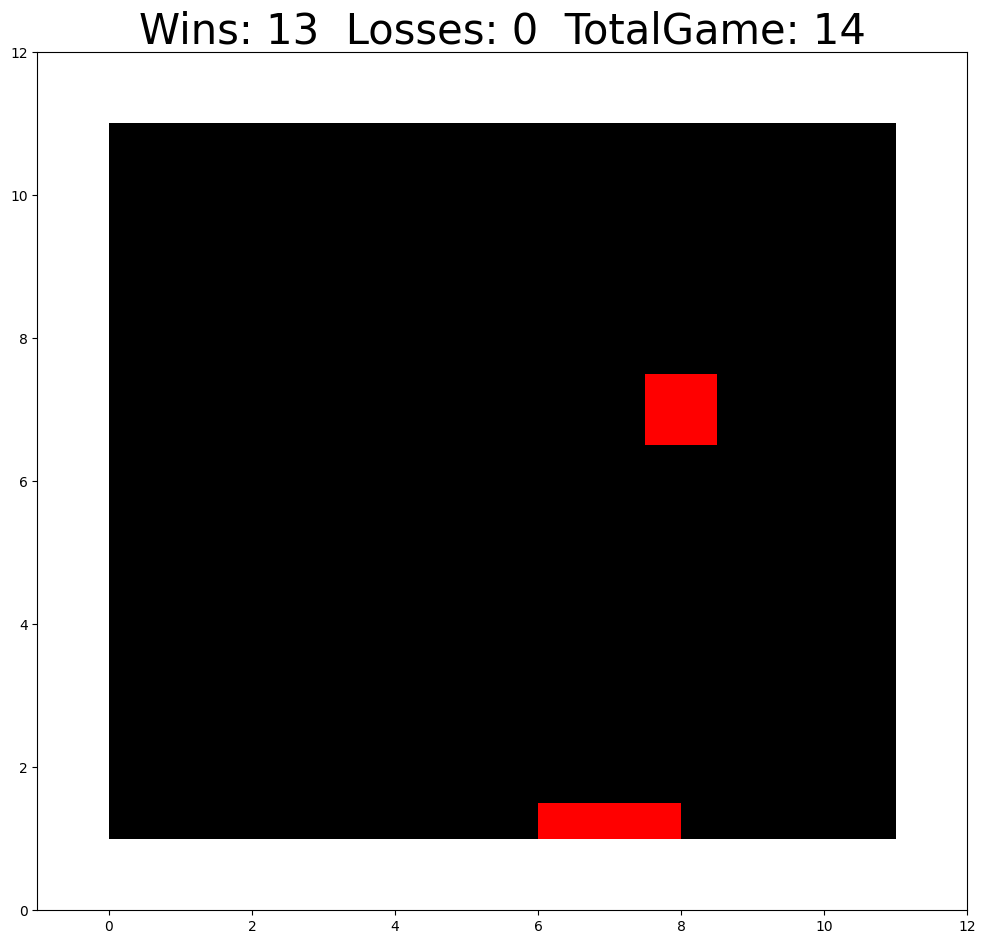

In [8]:
# To run this code you must use iPython. Also you can use the .ipynb file in ipython notebook mode.
%matplotlib
%matplotlib inline

from TrainCatch import CatchEnvironment
from TrainCatch import Qnet
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab as pl
import time
import torch
import torch.nn as nn
import math
import numpy as np


gridSize = 10 # The size of the grid that the agent is going to play the game on.
maxGames = 100
env = CatchEnvironment(gridSize)
winCount = 0
loseCount = 0
numberOfGames = 0

ground = 1
plot = pl.figure(figsize=(12,12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1, 12])
axis.set_ylim([0, 12])


def drawState(fruitRow, fruitColumn, basket):
  global gridSize
  # column is the x axis
  fruitX = fruitColumn
  # Invert matrix style points to coordinates
  fruitY = (gridSize - fruitRow + 1)
  statusTitle = "Wins: " + str(winCount) + "  Losses: " + str(loseCount) + "  TotalGame: " + str(numberOfGames)
  axis.set_title(statusTitle, fontsize=30)
  for p in [
    patches.Rectangle(
        ((ground - 1), (ground)), 11, 10,
        facecolor="#000000"      # Black
    ),
    patches.Rectangle(
        (basket - 1, ground), 2, 0.5,
        facecolor="#FF0000"     # No background
    ),
    patches.Rectangle(
        (fruitX - 0.5, fruitY - 0.5), 1, 1,
        facecolor="#FF0000"       # red
    ),
    ]:
      axis.add_patch(p)
  display.clear_output(wait=True)
  display.display(pl.gcf())


# Restore variables from disk.
q = Qnet()
q.load_state_dict(torch.load('./weights/Train_Catch.pth'))
print('load model!')

while (numberOfGames < maxGames):
  numberOfGames = numberOfGames + 1

  # The initial state of the environment.
  isGameOver = False
  fruitRow, fruitColumn, basket = tuple(env.reset())
  drawState(fruitRow, fruitColumn, basket)

  while (isGameOver != True):
    # Forward the current state through the network.
    s = np.array([fruitRow, fruitColumn, basket])
    out = q.forward(torch.from_numpy(s).float())
    # Find the max index (the chosen action).
    action = out.argmax().item()
    nextState, reward, gameOver = env.act(action)
    fruitRow = nextState[0]
    fruitColumn = nextState[1]
    basket = nextState[2]

    # Count game results
    if (reward == 1):
      winCount = winCount + 1
    elif (reward == -1):
      loseCount = loseCount + 1

    currentState = nextState
    isGameOver = gameOver
    drawState(fruitRow, fruitColumn, basket)
    time.sleep(0.4)

display.clear_output(wait=True)